In [213]:
import pandas as pd
import matplotlib.pyplot as plt      
import seaborn as sns
import re
from tqdm import tqdm
from ast import literal_eval
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import joblib

In [214]:
#reading train data
train= pd.read_csv('./Resources/train.csv')

train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [215]:
#reading test data
test= pd.read_csv('./Resources/test.csv')

test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


Text(0.5, 1.0, 'Missing Value count By Features')

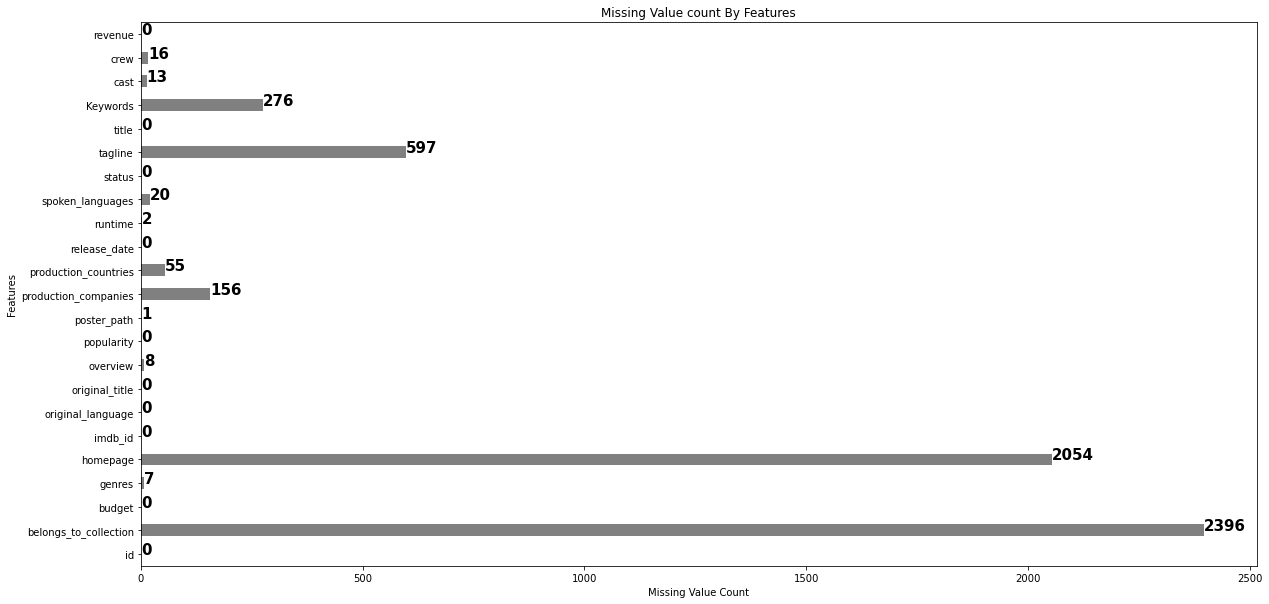

In [216]:
#Counting Missing Value By Features
train.isna().sum().plot(kind="barh", figsize=(20,10),color='grey')
for i, v in enumerate(train.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

Text(0.5, 1.0, 'Missing Value count By Features')

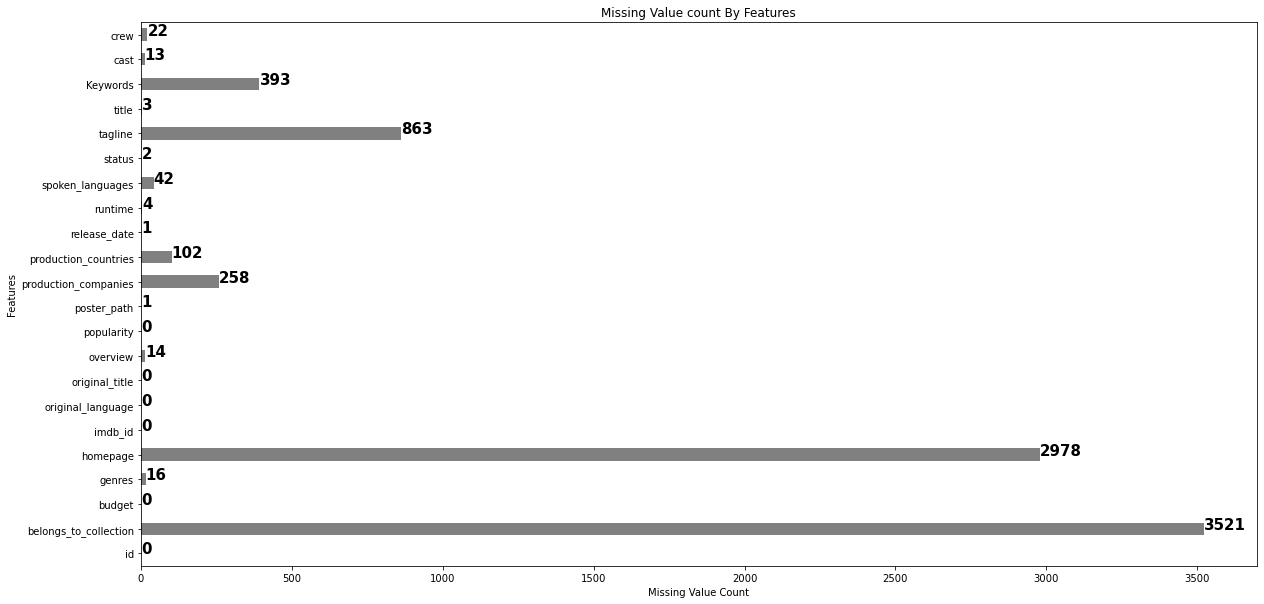

In [217]:
#Counting Missing Value By Features
test.isna().sum().plot(kind="barh", figsize=(20,10),color='grey')
for i, v in enumerate(test.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

In [218]:
# Read Train

train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Text(0, 0.5, 'revenue')

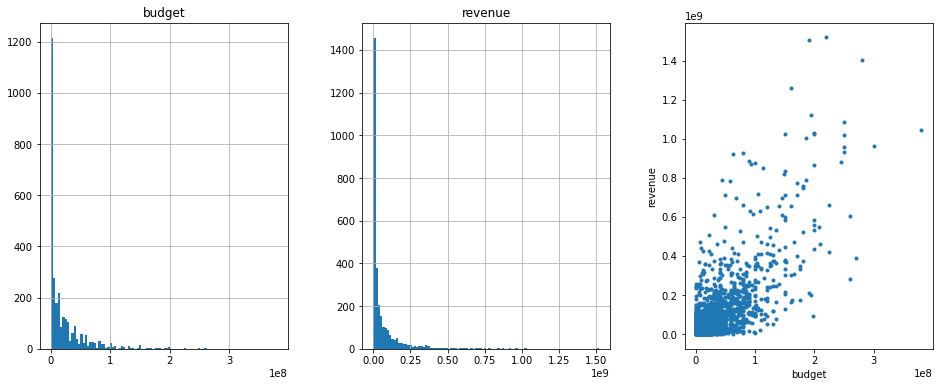

In [219]:
plt.figure(figsize=(16,6));
ax1 = plt.subplot(131)
train.hist('budget',bins=100,ax=ax1)
ax2 = plt.subplot(132)
train.hist('revenue',bins=100,ax=ax2)
ax3 = plt.subplot(133)
train.plot(x='budget',y='revenue',style='.',ax=ax3,legend=False)
plt.ylabel('revenue')

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

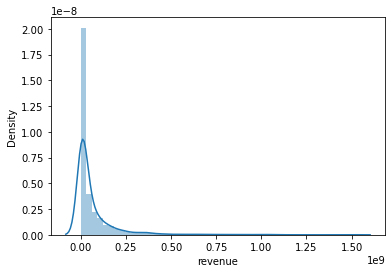

In [220]:
sns.distplot(train['revenue'])

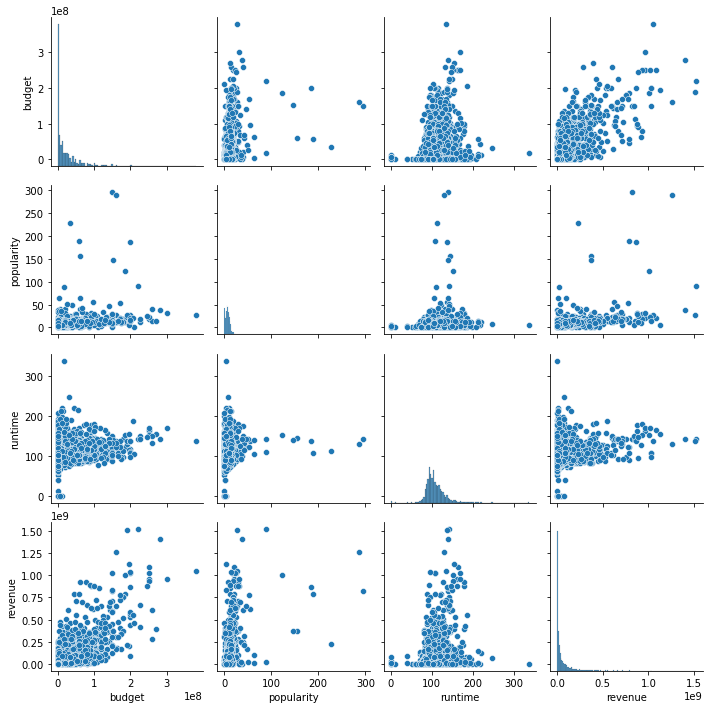

In [221]:
#pairplots
train_numer = train.select_dtypes(['number']).drop(['id'], axis=1).fillna(0)
sns.pairplot(train_numer)

In [222]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [223]:
#Formatting release_date column to datetime64
train['release_date'] =  pd.to_datetime(train['release_date'], infer_datetime_format=True)

In [224]:
#converting Release_date column to string.
train["release_date"]=train["release_date"].astype(str)

In [225]:
# Extracting Years
train.release_date.str.extract(r'([0-9]+)')

,0
0,2015
1,2004
2,2014
3,2012
4,2009
...,...
2995,1994
2996,2013
2997,1996
2998,2004


In [226]:
# # parse year
# final_df.release_date.str[0:4]

# parse year
train['release_year'] = train.release_date.str[0:4]
# parse month
train['release_month'] = train.release_date.str[5:7]
# parse date
train['release_day'] = train.release_date.str[-2:]
# check final dataframe
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,02,20
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,08,06
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,03,09
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,1994,04,22
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,2013,03,28
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,1996,10,11
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,2004,01,16


C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


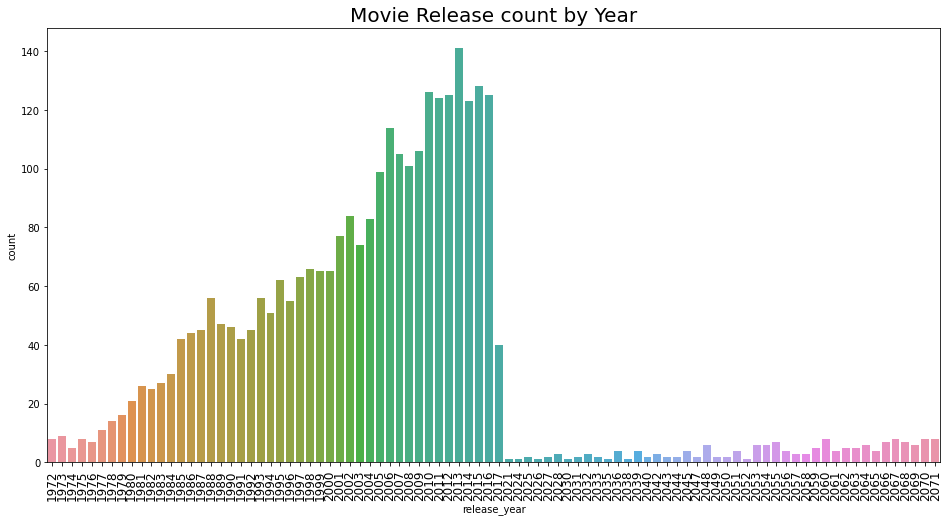

In [230]:
#counting Movie Releases by  Year
plt.figure(figsize=(16,8))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


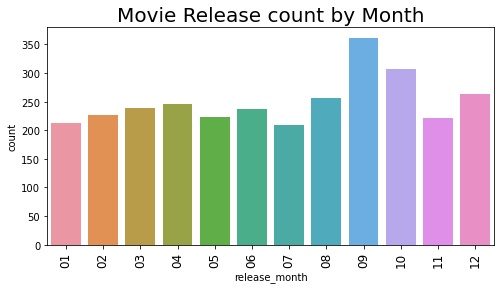

In [231]:
#counting Movie Releases by  month
plt.figure(figsize=(8,4))
sns.countplot(train['release_month'].sort_values())
plt.title("Movie Release count by Month", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


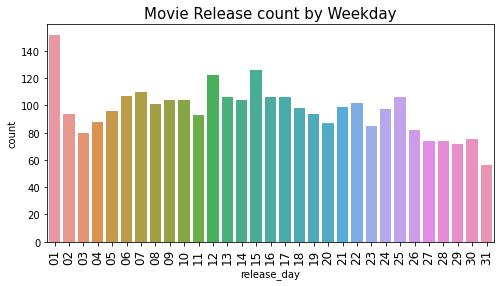

In [232]:
#counting Movie Releases by Weekday
plt.figure(figsize=(8,4))
sns.countplot(train['release_day'].sort_values())
plt.title("Movie Release count by Weekday", fontsize=15)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

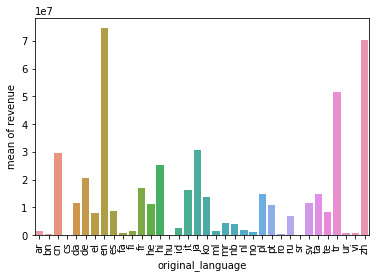

In [233]:
#mean of revenue across languages
revenue_by_lang = train.groupby('original_language')['revenue'].aggregate([np.mean])
revenue_by_lang.reset_index(inplace=True)
fig = sns.barplot(x='original_language', y='mean', data=revenue_by_lang)
fig.set(ylabel='mean of revenue')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

In [234]:
train.loc[train.genres.isnull(), 'genres'] = "{}"
train['genres'] = train.genres.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')

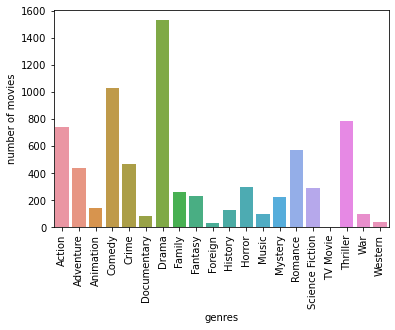

In [235]:
#number of movies across genres
movies_by_genre = pd.DataFrame(genres.sum(axis=0)).reset_index()
movies_by_genre.columns = ['genres', 'movies']
fig = sns.barplot(x='genres', y='movies', data=movies_by_genre)
fig.set(ylabel='number of movies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

In [236]:
train.loc[train.production_companies.isnull(), 'production_companies'] = "{}"
train['production_companies'] = train.production_companies.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
companies = train.production_companies.str.get_dummies(sep=',')

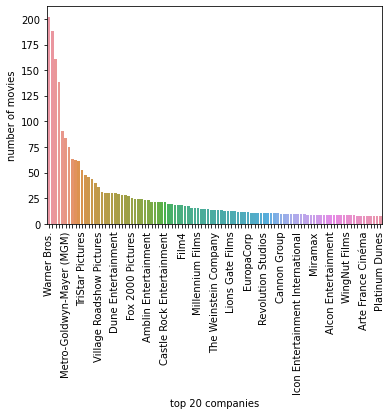

In [237]:
#number of movies by production companies
movies_by_companies = pd.DataFrame(companies.sum(axis=0)).reset_index()
movies_by_companies.columns = ['company', 'movies']
top_100_companies = movies_by_companies.sort_values(by='movies', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='company', y='movies', data=top_100_companies)
fig.set(ylabel='number of movies', xlabel='top 20 companies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

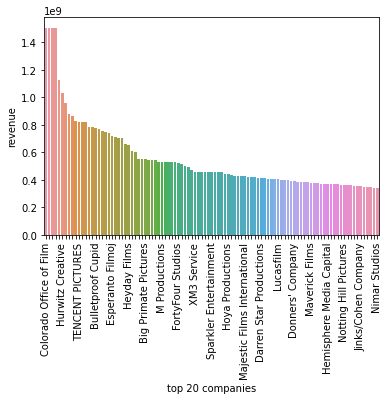

In [238]:
#revenue of movies by companies
revenue_by_companies = list()
for col in companies.columns:
    revenue_by_companies.append([col, train.loc[companies[col]==1, 'revenue'].median()])
revenue_by_companies = pd.DataFrame(revenue_by_companies, columns=['company', 'revenue'])
top_100_companies = revenue_by_companies.sort_values(by='revenue', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='company', y='revenue', data=top_100_companies)
fig.set(xlabel='top 20 companies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

In [239]:
train.loc[train.production_countries.isnull(), 'production_countries'] = "{}"
train['production_countries'] = train.production_countries.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
countries = train.production_countries.str.get_dummies(sep=',')

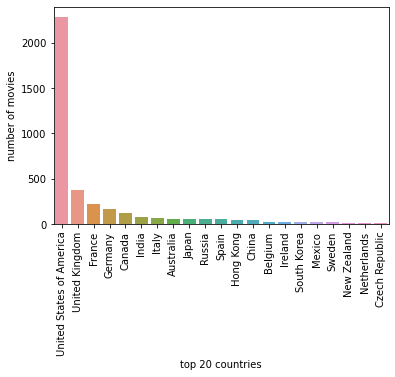

In [240]:
#top production names by no. of movies produced
movies_by_countries = pd.DataFrame(countries.sum(axis=0)).reset_index()
movies_by_countries.columns = ['countries', 'movies']
top_20_countries = movies_by_countries.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='countries', y='movies', data=top_20_countries)
fig.set(ylabel='number of movies', xlabel='top 20 countries')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

[Text(0.5, 0, 'top 20 countries')]

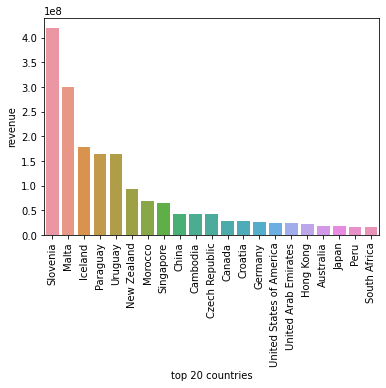

In [241]:
#top 20 countries by revenue
revenue_by_countries = list()
for col in countries.columns:
    revenue_by_countries.append([col, train.loc[countries[col]==1, 'revenue'].median()])
revenue_by_countries = pd.DataFrame(revenue_by_countries, columns=['country', 'revenue'])
top_20_countries = revenue_by_countries.sort_values(by='revenue', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='country', y='revenue', data=top_20_countries)
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set(xlabel='top 20 countries')

In [242]:
train.loc[train.spoken_languages.isnull(), 'spoken_languages'] = "{}"
train['spoken_languages'] = train.spoken_languages.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
languages = train.spoken_languages.str.get_dummies(sep=',')

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) miss

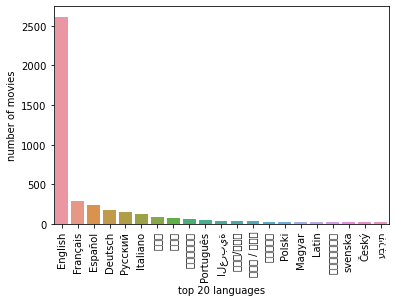

In [243]:
#Top 20 languages with highest revenue of movies
movies_by_languages = pd.DataFrame(languages.sum(axis=0)).reset_index()
movies_by_languages.columns = ['language', 'movies']
top_20_languages = movies_by_languages.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='movies', data=top_20_languages)
fig.set(ylabel='number of movies', xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3625 (\N{THAI CHARACTER SO RUSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from 

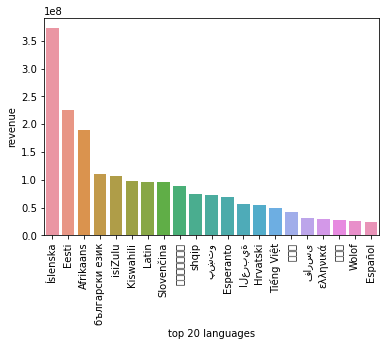

In [244]:
#Top 20 languages with lowest revenue of movies
revenue_by_languages = list()
for col in languages.columns:
    revenue_by_languages.append([col, train.loc[languages[col]==1, 'revenue'].median()])
revenue_by_languages = pd.DataFrame(revenue_by_languages, columns=['language', 'revenue'])
top_20_languages = revenue_by_languages.sort_values(by='revenue', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='revenue', data=top_20_languages)
fig.set(xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Mean Popularity Over Years')

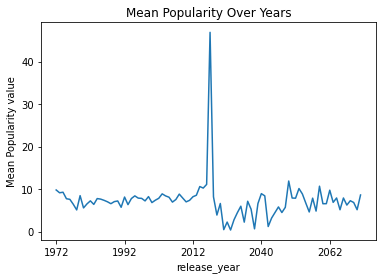

In [246]:
#Mean Popularity Over Years
release_year_mean_data=train.groupby(['release_year'])['budget','popularity','revenue'].mean()
release_year_mean_data.head()

fig = plt.figure(figsize=(6, 4))
release_year_mean_data['popularity'].plot(kind='line')
plt.ylabel('Mean Popularity value')
plt.title('Mean Popularity Over Years')